$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

In [79]:

import matplotlib.pyplot as plt
import numpy as np


file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data    	= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count   	= 0     # count for the number of images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):
    
    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)


#
# make a matrix each column of which represents an images in a vector form
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:
    line_data   = line.split(',')
    label       = int(line_data[0])   # Convert string to integer type
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)
    
    list_label[count]       = label
    list_image[:, count]    = im_vector.copy()
    
    count += 1

# [K-means Clustering]

Apply K-means clustering to MNIST training dataset with different $K = 5, 10, 15, 20$ and present the following results for each K.

In [104]:
def K_Means_Clustering(k):
    
    num = np.random.randint(0, 59999, k)        # Get random number
    
    # make a matrix of centroid
    centroid = np.zeros((size_row * size_col, k), dtype=float)
    count_number = np.zeros((size_row * size_col, k), dtype=float)

    # make a matrix of iteration
    iteration = np.zeros((size_row * size_col, k), dtype=float)
    
    list_distance = np.empty(k, dtype=float)
    
    dist_sum = np.zeros(k, dtype=float)
    energy_list = np.zeros(31 , dtype=float)
    
    label_cnt = np.zeros((10, k) , dtype=float)
    label_max_cnt = np.zeros(k, dtype=float)
    accuracy_list = np.zeros(31 , dtype=float)
  
    #
    # Initial Point
    #
    for i in range(k):
        centroid[:, i] = list_image[:, num[i]].copy()
    
    #
    # Iterating 30 times.
    #
    for iterate in range(31):

        for i in range(num_image):
            x = list_image[:, i]

            for j in range(k):
                y = centroid[:, j]
                list_distance[j] = distance(x, y)
                
            min_value = min(list_distance)
            distance_index = np.where(list_distance == min_value)
            iteration[:, int(distance_index[0])] += x
            count_number[:, int(distance_index[0])] += 1
            
            dist_sum[int(distance_index[0])] += min_value
            
            label_cnt[list_label[i], int(distance_index[0])] += 1
            
        #
        # compute Centroid
        #
        centroid = iteration.copy()
        centroid = centroid / count_number
        
        #
        # compute Energy
        #
        energy_sum = dist_sum.sum()
        energy_sum /= num_image
        energy_list[iterate] = energy_sum
        
        #
        # compute Accuracy
        #
        for t in range(k):
            label_max_cnt[t] = max(label_cnt[:, t])
            
        accuracy_list[iterate] = label_max_cnt.sum()
        accuracy_list[iterate] /= num_image

        #
        # initialize
        #
        dist_sum *= 0
        energy_sum = 0
        
        label_cnt *= 0
        
        iteration *= 0
        count_number *= 0
        
    for label in range(k):           # plot images

        im_matrix   = centroid[:, label].reshape((size_row, size_col))

        plt.subplot(k // 5, 5, label + 1)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()

    return np.array(energy_list), np.array(accuracy_list), np.array(centroid)
    # Return Energy, Accuracy, Centroid

# [Energy]

$\sum_{k = 1}^K \| x_i - c_{k_i} \|^2$
where $k_i$ denotes the category of $x_i$, and $c_{k_i}$ denotes the centroid of category $x_i$.

* Plot the training energy per optimization iteration.

In [105]:
def Energy():
    
    x = range(31)       # Iterating 30 times.
    y = E[x]            # Energy per optimization iteration.
    plt.plot(x, y, "RED")
    plt.title(' Training Energy')
    plt.xlabel('Iterations')
    plt.ylabel('Energy')
    
    plt.show()

# [Accuracy]

$\frac{\sum_{k = 1}^K m_k}{N}$
where $N$ denotes the total number of data, and $m_k$ denotes the number of data with majority for category $k$.

* Plot the training accuracy per optimization iteration.

In [106]:
def Accuracy():
    
    x = range(31)       # Iterating 30 times.
    y = A[x]            # Accuracy per optimization iteration
    plt.plot(x, y, "BLUE")
    plt.title(' Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    
    plt.show()

**Visualize $K$ centroid images for each category.**

## K = 5

* Results of running the K-means with $K=5$

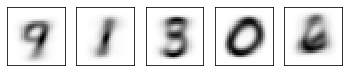

In [95]:
k = 5

E, A, C = K_Means_Clustering(k)  # Visualize K centroid images for K = 5.

# Final average image for K

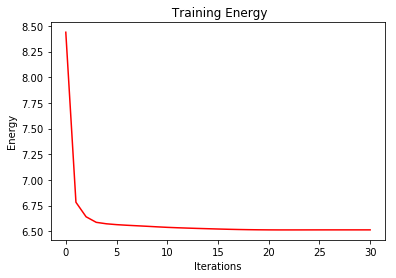

In [96]:
Energy()    # Plot the training energy per optimization iteration.

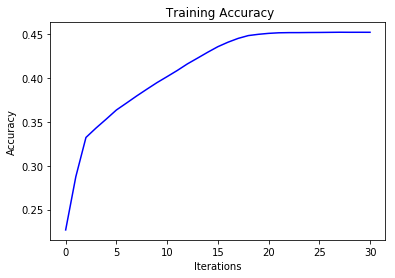

In [97]:
Accuracy()    # Plot the training accuracy per optimization iteration.

## k = 10

* Results of running the K-means with $K=10$

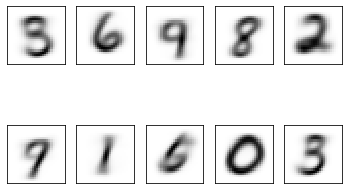

In [87]:
k = 10

E, A, C = K_Means_Clustering(k)  # Visualize K centroid images for K = 10.

# Final average image for K

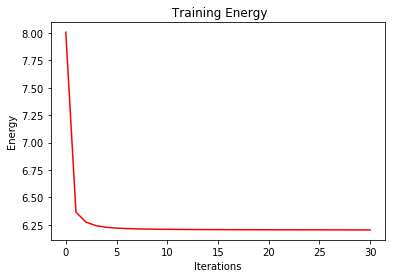

In [88]:
Energy()    # Plot the training energy per optimization iteration.

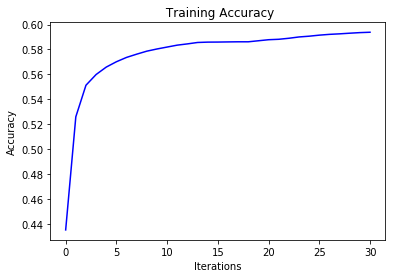

In [89]:
Accuracy()    # Plot the training accuracy per optimization iteration.

## K = 15

* Results of running the K-means with $K=15$

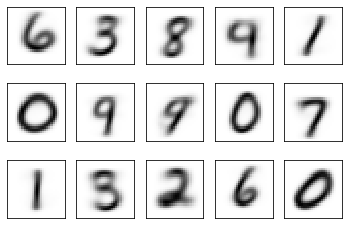

In [49]:
k = 15

E, A, C = K_Means_Clustering(k) # Visualize K centroid images for K = 15.

# Final average image for K

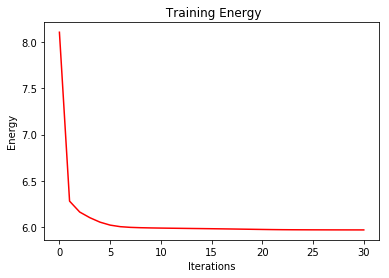

In [50]:
Energy()    # Plot the training energy per optimization iteration.

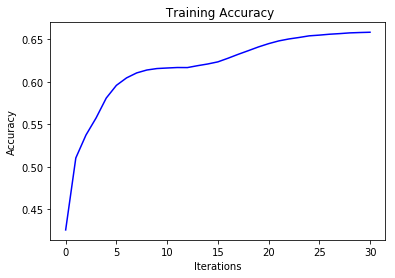

In [51]:
Accuracy()    # Plot the training accuracy per optimization iteration.

## K = 20

* Results of running the K-means with $K=20$

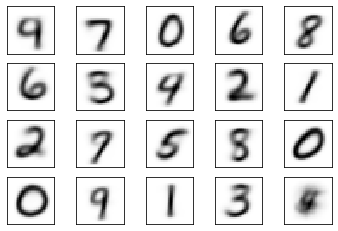

In [125]:
k = 20

E, A, C = K_Means_Clustering(k) # Visualize K centroid images for K = 20.

# Final average image for K

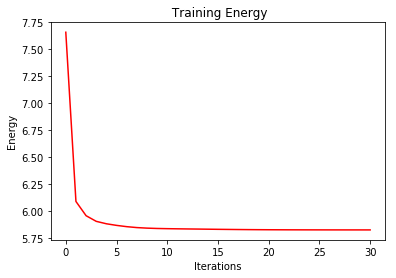

In [126]:
Energy()    # Plot the training energy per optimization iteration.

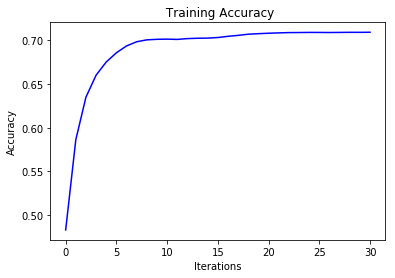

In [127]:
Accuracy()    # Plot the training accuracy per optimization iteration.

$\ Load\ \ MNIST\ \ Test\ \ dataset$

In [128]:
file_data		= "mnist_test.csv"
handle_file	= open(file_data, "r")
test_data    	= handle_file.readlines()
handle_file.close()

size_data = len(test_data)
count = 0   # count for the number of images

#
# make a matrix each column of which represents an images in a vector form
#
test_image  = np.empty((size_row * size_col, size_data), dtype=float)
test_label  = np.empty(size_data, dtype=int)


for line in test_data:
    test_line   = line.split(',')
    label       = int(test_line[0])   # Convert string to integer type
    test_vector   = np.asfarray(test_line[1:])
    test_vector   = normalize(test_vector)
    
    test_label[count]  = label
    test_image[:, count]    = test_vector
    count += 1


## [Testing Accuracy]

Testing accuracy is computed on the testing dataset.

In [129]:
def Testing(Average_Image):    # Get Average images
    
    # make a matrix of centroid
    centroid = np.zeros((size_row * size_col, k), dtype=float)
    
    # make a matrix of iteration
    iteration = np.zeros((size_row * size_col, k), dtype=float)
    count_number = np.zeros((size_row * size_col, k), dtype=float)
    
    list_distance = np.empty(k, dtype=float)
    
    label_cnt = np.zeros((10, k) , dtype=float)
    label_max_cnt = np.zeros(k, dtype=float)
    accuracy_list = np.zeros(31 , dtype=float)
    
    #
    # Initial Point
    #
    centroid = Average_Image
    
    #
    # Iterating 30 times.
    #
    for iterate in range(31):

        for i in range(size_data):
            x = test_image[:, i]

            for j in range(k):
                y = centroid[:, j]
                list_distance[j] = distance(x, y)
                
            min_value = min(list_distance)
            distance_index = np.where(list_distance == min_value)
            iteration[:, int(distance_index[0])] += x
            count_number[:, int(distance_index[0])] += 1
       
            label_cnt[test_label[i], int(distance_index[0])] += 1
            
        #
        # compute Centroid
        #
        centroid = iteration.copy()
        centroid = centroid / count_number
        
        #
        # compute Accuracy
        #
        for t in range(k):
            label_max_cnt[t] = max(label_cnt[:, t])
        
        accuracy_list[iterate] = label_max_cnt.sum()
        accuracy_list[iterate] /= size_data
            
        #
        # initialize
        #
        label_cnt *= 0
        iteration *= 0
        count_number *= 0

    for label in range(k):                    # plot images

        im_matrix   = centroid[:, label].reshape((size_row, size_col))

        plt.subplot(k // 5, 5, label + 1)
        plt.imshow(im_matrix, cmap='Greys', interpolation='None')

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)

    plt.show()
    
    
    x_axis = range(31)              # Iterating 30 times.
    y_axis = accuracy_list[x_axis]  # Accuracy per optimization iteration
    plt.plot(x_axis, y_axis, "BLUE")
    plt.title(' Testing Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    
    plt.show()

**[Testing]  K - Means Clustering for $K=20$ on the training dataset**

* Plot the testing accuracy per optimization iteration.

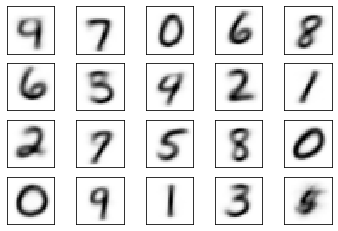

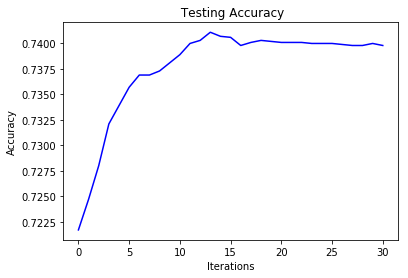

In [130]:
# Results of running the K-means with  𝐾 = 20
Average_Image = C

Testing(Average_Image)   # plot images and accuracy

# Final test average image